# Day 1 - Data Exploration

### Questions to answer

- understand the shape of data
- understand objects: understand how many individuals are part of the study? 
- undetsand what the columns are telling us 
- get understanding of quality of data
- do we need a unique ID per person? 

### Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = '/Users/bernadettebrandner/code/bernadetti0/predicting_activity/predicting_activity/raw_data/aw_fb_data.csv'

In [3]:
data = pd.read_csv(path)
data.tail()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
6259,6260,3666,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6263,6264,3670,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs


<Axes: xlabel='sd_norm_heart', ylabel='Count'>

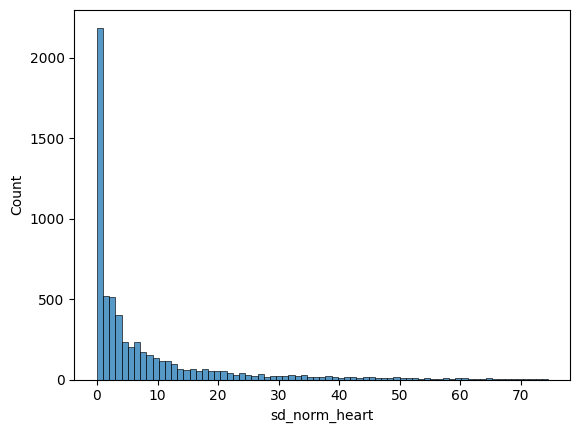

In [4]:
var = data.sd_norm_heart
sns.histplot(var)

- corr_heart is a correlation
- intensity carvonen looks suspicious --> it has the value 0 even though the person is running

<Axes: xlabel='norm_heart', ylabel='Count'>

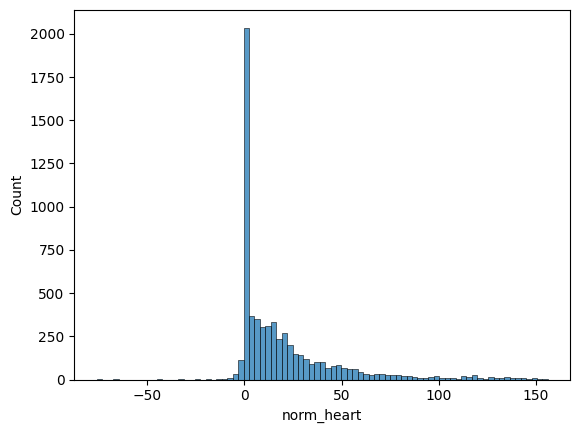

In [5]:
sns.histplot(data.norm_heart)

<Axes: xlabel='norm_heart', ylabel='hear_rate'>

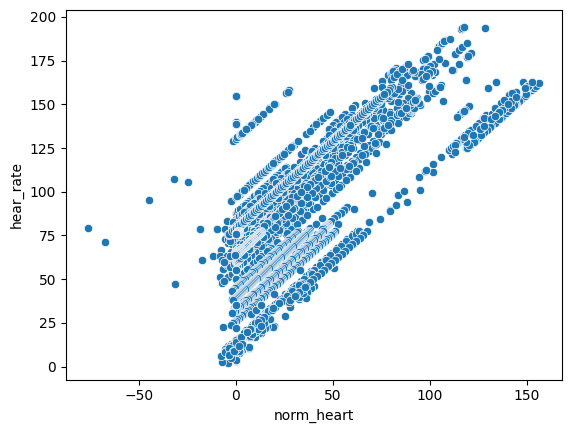

In [6]:
sns.scatterplot(x =data['norm_heart'], y=data['hear_rate'])

# Clean dataset

In [7]:
data_new = data.copy()  # Make a copy of the original DataFrame
data_new.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
data_new.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)


In [8]:
duplicates = data_new[data_new.duplicated() == True] # --> no duplicates

In [9]:
data_new.isnull().sum().any() # --> no null values

False

In [10]:
data_new.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   heart_rate            6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_steps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

# Feature Engineering

### Create a unique identifyer for each participant

In [11]:
data_new.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [12]:
#data_new.insert(loc=0, column='participant_id', value = data_new.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [13]:
data_new.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


### Create a BMI column

In [14]:
data_new['bmi'] = round(data_new.weight / (data_new.height/100)**2)
data_new.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


# Encoding and Scaling

In [15]:
# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [16]:
le = LabelEncoder()
le.fit(data_new.device)
data_new.device = le.transform(data_new.device)
le.fit(data_new.activity)
data_new.activity = le.transform(data_new.activity)
data_new.tail()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
6259,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0,1,3,29.0
6260,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,1,3,29.0
6261,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,1,3,29.0
6262,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,1,3,29.0
6263,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,1,3,29.0


In [18]:
data_new.describe()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239,0.416347,2.315134,24.044540
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530,0.492992,1.736421,3.228253
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690,0.000000,0.000000,16.000000
25%,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260,0.000000,1.000000,22.000000
50%,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619,0.000000,2.000000,24.000000
75%,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562,1.000000,4.000000,26.000000
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000,1.000000,5.000000,34.000000


# Splitting the dataset

In [19]:
data_apple = data_new[data_new.device == 0.0]
data_fitbit = data_new[data_new.device == 1.0]

In [32]:
from sklearn.model_selection import train_test_split

X_apple = data_apple.drop(columns = 'activity')
y_apple = data_apple['activity']

X_fitbit = data_fitbit.drop(columns = 'activity')
y_fitbit = data_fitbit['activity']


# Label encoder

In [33]:
le = LabelEncoder()

#Encode Apple
le.fit(y_apple)
y_apple= le.transform(y_apple)

#Encode Fitbit
le.fit(data_new.activity)
y_fitbit= le.transform(y_fitbit)


# Train Test Split

In [ ]:

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_apple, y_apple, test_size =0.3, random_state = 42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fitbit, y_fitbit, test_size =0.3, random_state = 42)

In [23]:
#Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train_a)

X_train_scaled_a = scaler.transform(X_train_a)
X_test_scaled_a = scaler.transform(X_test_a)

X_train_scaled_f = scaler.transform(X_train_f)
X_test_scaled_f = scaler.transform(X_test_f)


# Feature Selection 

### Checking the pearson correlation

In [24]:
data_core_features = data_apple[['age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi','activity']]

data_core_features

,age,gender,height,weight,steps,heart_rate,calories,distance,bmi,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0,0
...,...,...,...,...,...,...,...,...,...,...
3651,46,0,157.5,71.4,163.000000,157.250000,0.701500,0.075200,29.0,3
3652,46,0,157.5,71.4,6.666667,157.307692,0.701500,0.075475,29.0,3
3653,46,0,157.5,71.4,6.750000,156.250000,0.732000,0.075695,29.0,3
3654,46,0,157.5,71.4,6.791667,158.090909,0.612500,0.077270,29.0,3


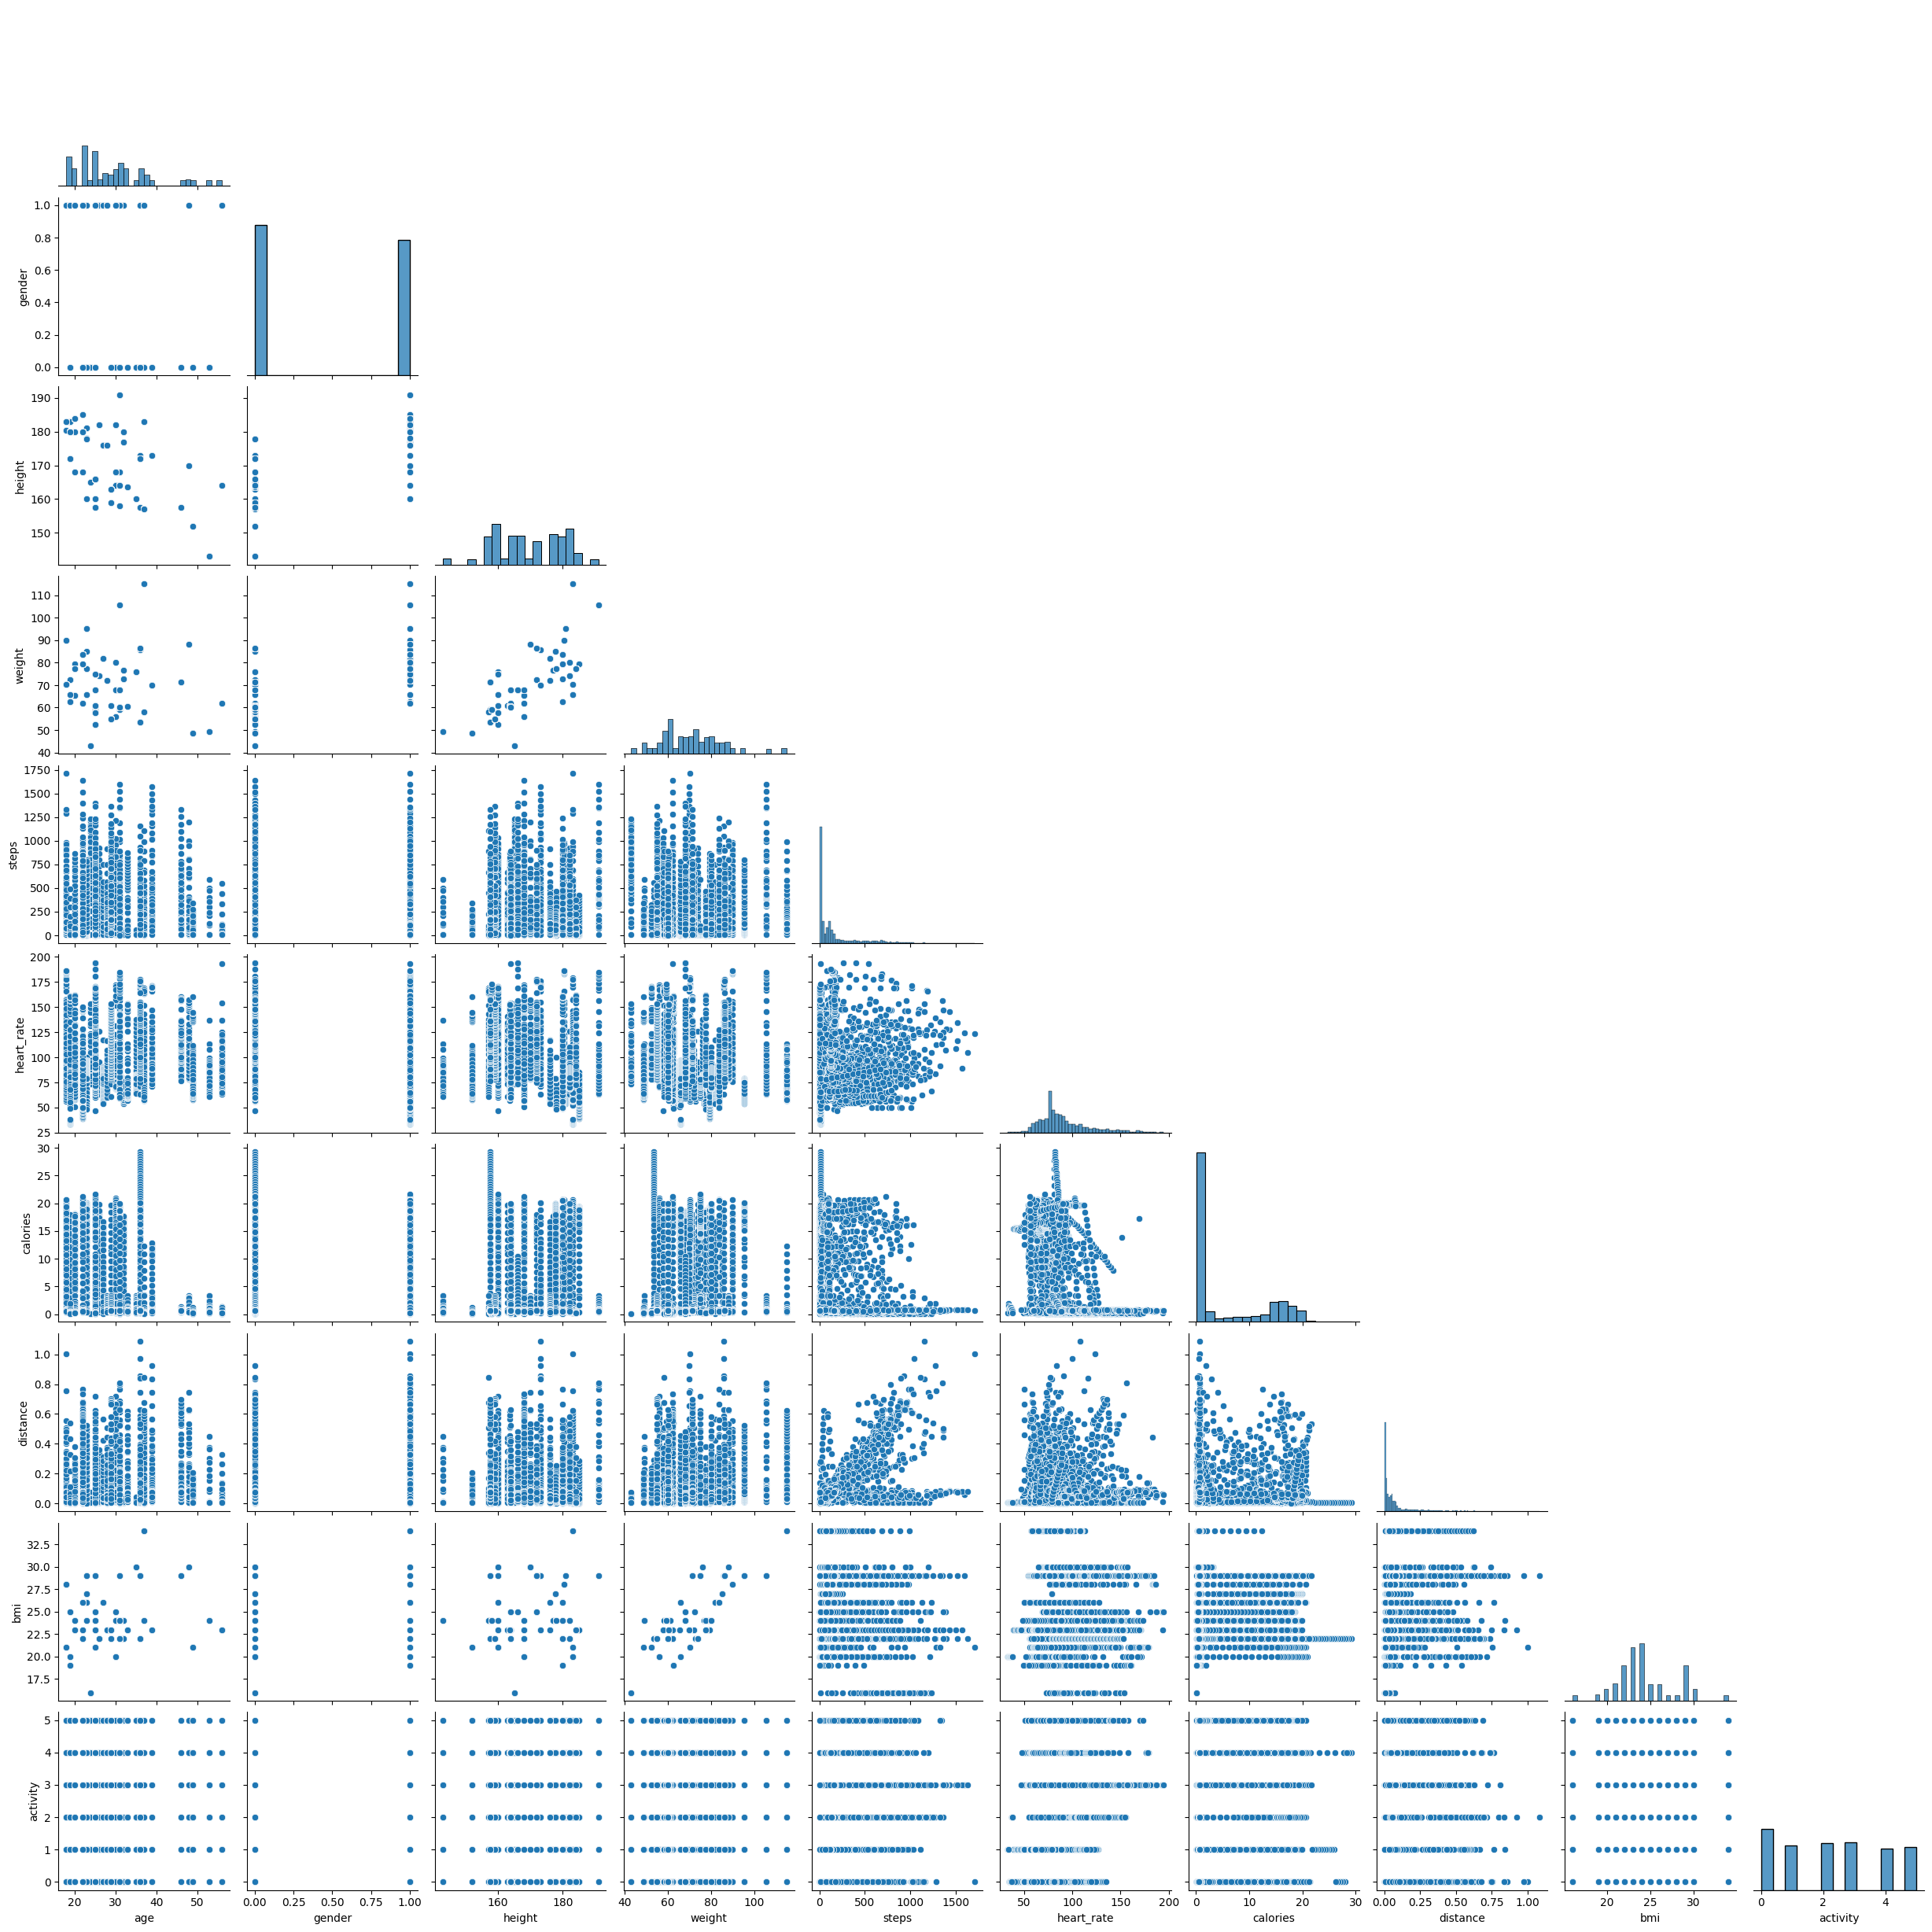

In [25]:
sns.pairplot(data_core_features, corner = True)

<Axes: >

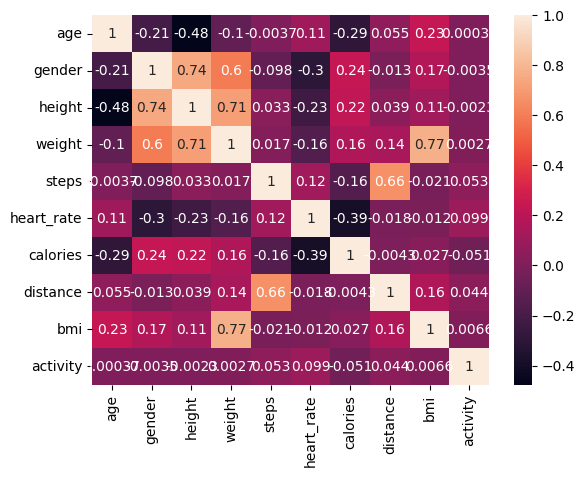

In [27]:
corr = data_core_features.corr()
sns.heatmap(corr, annot = True)

In [ ]:
data_apple.shape

# Apple Watch